    Ben Christensen
    Math 402
    December 4, 2018

# Wave Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
%matplotlib notebook

## Problem 1

Complete the function `wave_eqn()` by implementing the method given in the lab.

Consider the initial boundary value problem

\begin{align*}
	u_{tt} &= u_{xx}, \\
	u(0,t) &= u(1,t) = 0, \\
	u(x,0) &= \sin(2 \pi x),\\
	u_t(x,0) &= 0.
\end{align*}

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,.5\right]$.
Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension.
Animate the results.
Compare your results with the analytic solution $u(x,t) = \sin{(2 \pi x)} \cos{(2 \pi t)}$.
This function is known as a standing wave.

In [3]:
def wave_eqn(s,f,g,a,b,t_f,J,M):
    """Computes a numerical solution for the wave equation 
    initial/boundary value problem on a line:
    
        u_tt = (s^2)u_xx, x∈[a,b], t∈[0,t_f]
        u(a,t) = u(b,t) = 0
        u(x,0) = f(x)
        u_t(x,0) = g(x)
        
    Parameters
    ----------
        s (float): wave speed
        f (function): initial amplitude
        g (function): initial velocity
        a (float): left-hand space boundary
        b (float): right-hand space boundary
        t_f (float): final time value
        J (int): number of space steps
        M (int): number of time steps
    
    Returns
    ----------
        x (ndarray of shape (J+1,)): spacial domain points
        t (ndarray of shape (M+1,)): time domain points
        U (ndarray of shape (M+1,J+1)): Approximate solution array
    """
    #Initialize U
    U = np.zeros((M+1, J+1))
    x = np.linspace(a, b, J+1)
    #Create first row of U
    U[0][1:J] = [f(x_j) for x_j in x[1:J]]
    t = np.linspace(0, t_f, M+1)
    dx, dt = (b-a)/J, t_f/M
    lmbda = s*dt/dx
    #Calculate second row of U
    U[1][1:J] = [U[0][j] + g(x[j])*dt + .5*lmbda**2 * (U[0][j-1] - 2*U[0][j] + U[0][j+1]) for j in range(1, J)]
    #Define A
    A = np.zeros((J+1, J+1))
    np.fill_diagonal(A, 2*(1-lmbda**2))
    np.fill_diagonal(A[1:,:-1], lmbda**2)
    np.fill_diagonal(A[:-1, 1:], lmbda**2)
    #Calculate the rest of the rows of U
    for i in range(2, M+1):
        U[i] = A@U[i-1] - U[i-2]
        U[i,0], U[i,-1] = 0,0
    return x, t, U

In [4]:
#setup initial conditions
s,f,g,a,b,t_f,J,M = 1, lambda x: np.sin(2*np.pi*x), lambda x: 0, 0, 1, .5, 50, 50
x, t, U = wave_eqn(s,f,g,a,b,t_f,J,M)

<IPython.core.display.Javascript object>


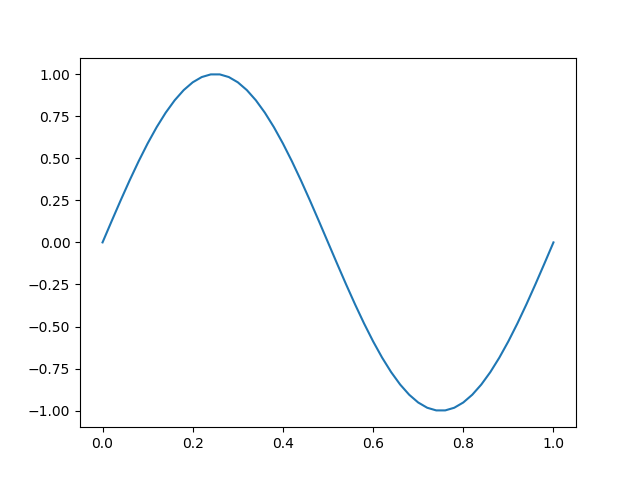

In [5]:
plt.plot(x, U[0])
plt.show()

<IPython.core.display.Javascript object>


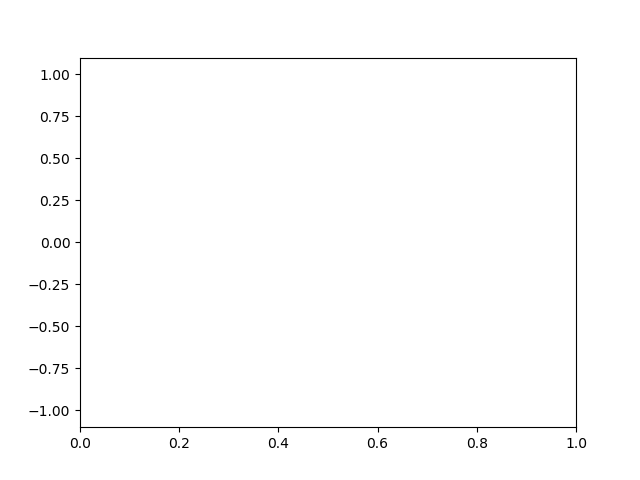

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.1,1.1))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    #Clear the axis
    ax.clear()
    ax.plot(x,U[i])
    #Reset graph limits after each clear
    ax.set_xlim((0,1))
    ax.set_ylim((-1.1,1.1))
ani = animation.FuncAnimation(fig, update, frames=range(M), interval=25)
#ani.save("prob1.mp4")


## Problem 2

Consider the initial boundary value problem

\begin{align*}
	u_{tt} &= u_{xx}, \\
	u(0,t) &= u(1,t) = 0, \\
	u(x,0) &= .2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) &= .4m^2(x-1/2)e^{-m^2(x-1/2)^2}.
\end{align*}

The solution of this problem is a Gaussian pulse.
It travels to the right at a constant speed.
This solution models, for example, a wave pulse in a stretched string.
Note that the fixed boundary conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 1\right]$.
Set $m=20$.
Use 200 subintervals in space and 220 in time, and animate your results.
Then use 200 subintervals in space and 180 in time, and animate your results.
Note that the stability condition is not satisfied for the second mesh.

In [7]:
#setup initial conditions
m = 20
f = lambda x: .2*np.exp(-m**2 * (x-.5)**2)
g = lambda x: .4*m**2 * (x-.5)*np.exp(-m**2 * (x-.5)**2)
s,a,b,t_f,J,M = 1, 0, 1, 1, 200, 220
x, t, U = wave_eqn(s,f,g,a,b,t_f,J,M)

<IPython.core.display.Javascript object>


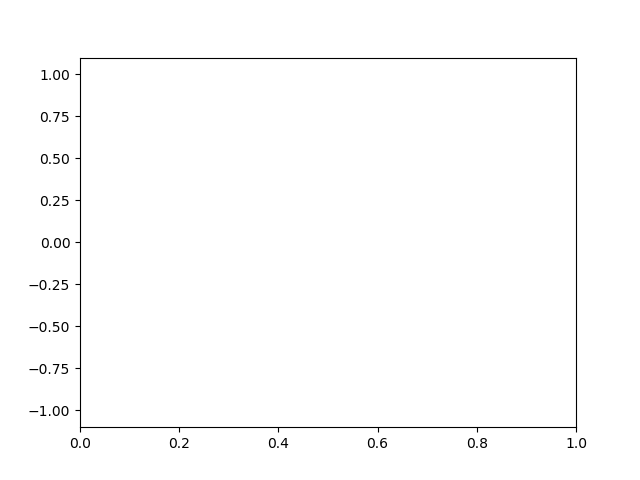

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.1,1.1))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    #Clear the axis
    ax.clear()
    ax.plot(x,U[i])
    #Reset graph limits after each clear
    ax.set_xlim((0,1))
    ax.set_ylim((-1.1,1.1))
ani = animation.FuncAnimation(fig, update, frames=range(M), interval=25)
#ani.save("prob2_i.mp4")

In [9]:
#setup initial conditions
m = 20
f = lambda x: .2*np.exp(-m**2 * (x-.5)**2)
g = lambda x: .4*m**2 * (x-.5)*np.exp(-m**2 * (x-.5)**2)
s,a,b,t_f,J,M = 1, 0, 1, 1, 200, 180
x, t, U = wave_eqn(s,f,g,a,b,t_f,J,M)

<IPython.core.display.Javascript object>


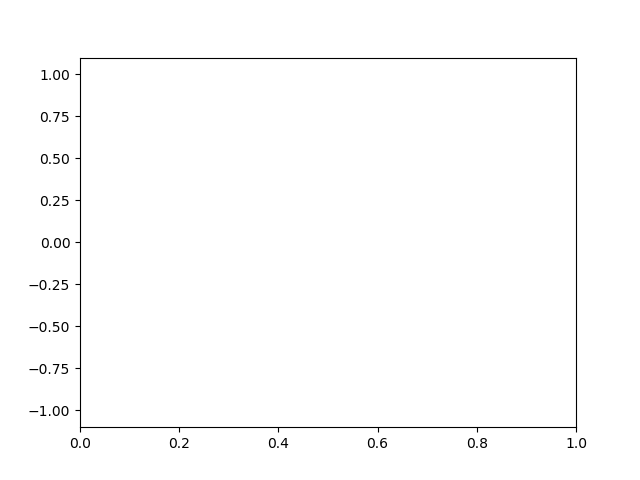

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.1,1.1))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    #Clear the axis
    ax.clear()
    ax.plot(x,U[i])
    #Reset graph limits after each clear
    ax.set_xlim((0,1))
    ax.set_ylim((-1.1,1.1))
ani = animation.FuncAnimation(fig, update, frames=range(M), interval=25)
#ani.save("prob2_ii.mp4")

## Problem 3

Consider the initial boundary value problem

\begin{align*}
	u_{tt} &= u_{xx}, \\
	u(0,t) &= u(1,t) = 0, \\
	u(x,0) &= .2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) &= 0.
\end{align*}

The initial condition separates into two smaller, slower-moving pulses, one traveling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two traveling waves, one traveling to the left and the other to the right, as described earlier.

In [11]:
#setup initial conditions
m = 20
f = lambda x: .2*np.exp(-m**2 * (x-.5)**2)
g = lambda x: 0
s,a,b,t_f,J,M = 1, 0, 1, 2, 200, 440
x, t, U = wave_eqn(s,f,g,a,b,t_f,J,M)

<IPython.core.display.Javascript object>


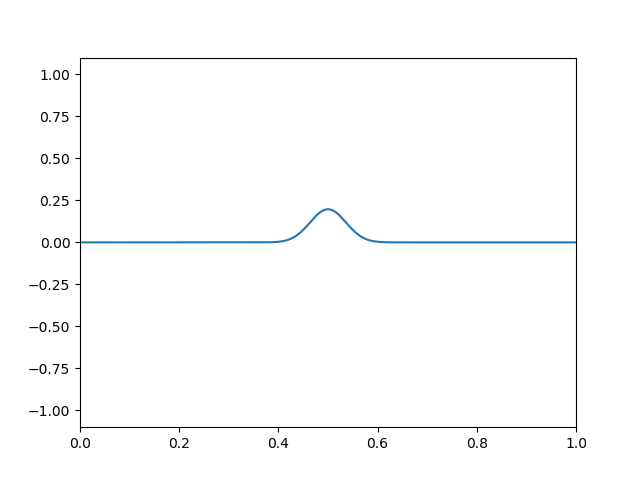

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.1,1.1))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    #Clear the axis
    ax.clear()
    ax.plot(x,U[i])
    #Reset graph limits after each clear
    ax.set_xlim((0,1))
    ax.set_ylim((-1.1,1.1))
ani = animation.FuncAnimation(fig, update, frames=range(M), interval=25)
ani.save("prob3.mp4")

## Problem 4

Consider the initial boundary value problem

\begin{align*}
	u_{tt} &= u_{xx}, \\
	u(0,t) &= u(1,t) = 0, \\
	u(x,0) &= \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) &= 0.
\end{align*}

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

In [13]:
#setup initial conditions
f = lambda x: 1/3 if x < 6/11 and x > 5/11 else 0
g = lambda x: 0
s,a,b,t_f,J,M = 1, 0, 1, 2, 200, 440
x, t, U = wave_eqn(s,f,g,a,b,t_f,J,M)

<IPython.core.display.Javascript object>


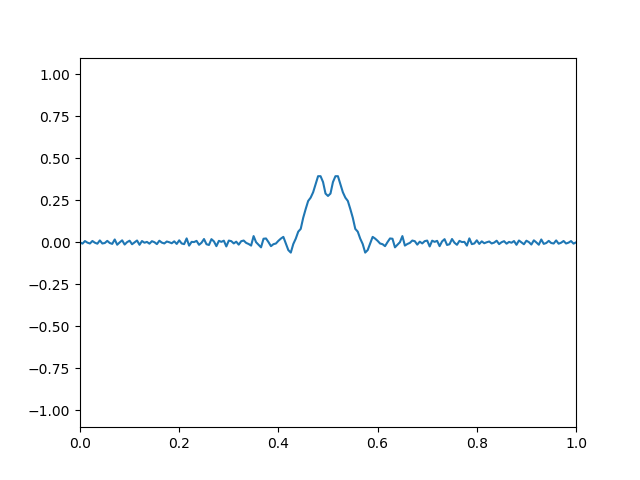

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.1,1.1))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    #Clear the axis
    ax.clear()
    ax.plot(x,U[i])
    #Reset graph limits after each clear
    ax.set_xlim((0,1))
    ax.set_ylim((-1.1,1.1))
ani = animation.FuncAnimation(fig, update, frames=range(M), interval=25)
ani.save("prob4.mp4")

## Problem 5

Numerically solve the initial value problem

\begin{align*}
	&{ } u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	&{ } u(x,0) = \hat{u}(x) + v(x),
\end{align*}

for $t \in [0,1]$ and where $\hat{u}(x)$ is as given in the lab.
Let the perturbation $v(x)$ be given by

$$v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}$$

Approximate the $x$ domain, $(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the traveling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.

In [15]:
from scipy.optimize import fsolve

def f(U1,U0,s,K1,K2):
    """The nonlinear implicit Crank-Nicholson equations for 
    the transformed Burgers' equation.
    
    Parameters
    ----------
        U1 (ndarray): The values of U^(n+1)
        U0 (ndarray): The values of U^n
        s (float): wave speed
        K1 (float): first constant in the equations
        K2 (float): second constant in the equations
    
    Returns
    ----------
        out (ndarray): The residuals (differences between right- and 
                    left-hand sides) of the equation, accounting 
                    for boundary conditions
    """
    num_columns = U1.shape[-1]
    residuals = [U1[j] - U0[j] - K1*((s-U1[j])*(U1[j+1]-U1[j-1])+(s-U0[j])*(U0[j+1]-U0[j-1])) - K2*((U1[j+1]-2*U1[j]+U1[j-1])+(U0[j+1]-2*U0[j]+U0[j-1])) for j in range(1, num_columns-1)]
    residuals = [U1[0] - U0[0]] + residuals + [U1[-1]-U0[-1]]
    return residuals
    

In [16]:
#setup initial conditions
J, M = 150, 350
dx = 40/J
dt = 1/M
x = np.linspace(-20,20,J+1)
K1, K2 = dt/(4*dx), dt/(2*dx**2)
u_minus, u_plus = 5, 1
s = (u_minus+u_plus)/2
a = (u_minus - u_plus)/2
U = np.zeros((M+1, J+1))
U[0,0], U[0,-1] = u_minus, u_plus
v = lambda x: 3.5*(np.sin(3*x)+1)*(1/np.sqrt(2*np.pi))*np.exp(-.5*x**2)
uhat = lambda x: s - a*np.tanh(a*x/2)
U[0][1:J+1] = [uhat(x_j)+v(x_j) for x_j in x[1:J+1]]
initial_guess = U[0]
#use fsolve to find the rows of U[1:]
for i in range(1, M+1):
    U[i] = fsolve(f, initial_guess, args=(U[i-1], s, K1, K2))

<IPython.core.display.Javascript object>


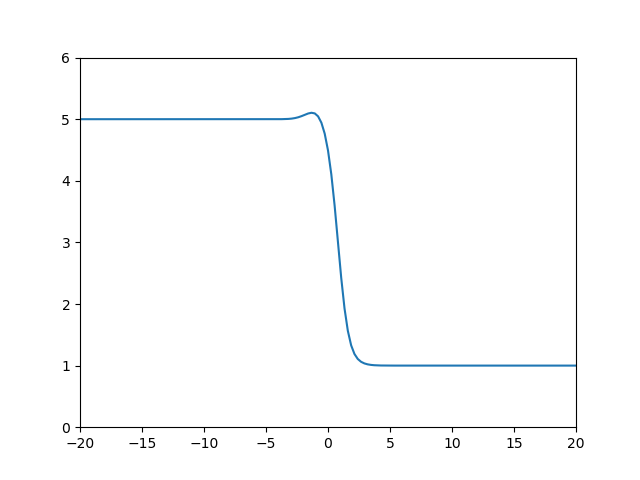

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-20,20))
ax.set_ylim((0,6))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    #Clear the axis
    ax.clear()
    ax.plot(x,U[i])
    #Reset graph limits after each clear
    ax.set_xlim((-20,20))
    ax.set_ylim((-0,6))
ani = animation.FuncAnimation(fig, update, frames=range(350), interval=25)
ani.save("prob5.mp4")

<IPython.core.display.Javascript object>


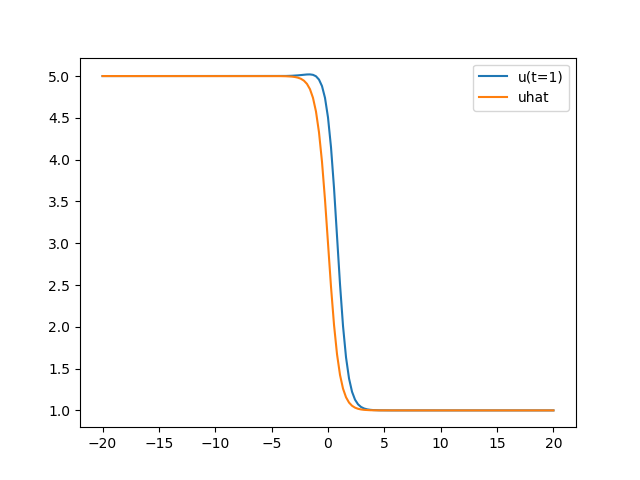

In [21]:
fig = plt.figure()
plt.plot(x, U[-1], label="u(t=1)")
plt.plot(x, uhat(x), label="uhat")
plt.legend()
plt.show()